In [1]:
import pandas as pd
data1 = pd.read_csv("data_origin/Bomin_culture_offensive_word_chinese.csv")
data2 = pd.read_csv('data_origin/ShiYike_culture_offensive_word_chinese.csv')
data3 = pd.read_csv("data_origin/Helen_culture_offensive_word_chinese.csv")

In [2]:
data = data1.copy().rename(columns={"Annotation": "human_label_1"})
data["human_label_1"] = data1["Annotation"].map(lambda x : None if x == 'na' else int(x))
data["human_label_2"] = data2["Annotation"].map(lambda x : None if x == 'na' else int(x))
data["human_label_3"] = data3["Annotation"].map(lambda x : None if x == 'na' else int(x))
data.loc[data.isnull().any(axis=1)]

,culture,word_category,word,human_label_1,human_label_2,human_label_3
7,Chinese,noun.act,Loud talking,1.0,NaN,1.0
21,Chinese,noun.artifact,Manchu Queue,1.0,NaN,0.0
23,Chinese,noun.artifact,Cultural Revolution,1.0,NaN,1.0
24,Chinese,noun.artifact,Tibetan Independence,1.0,NaN,1.0
27,Chinese,noun.artifact,Tibet,1.0,NaN,0.0
...,...,...,...,...,...,...
368,Chinese,verb.possession,Degrade,1.0,NaN,1.0
380,Chinese,verb.stative,kill,0.0,NaN,1.0
381,Chinese,verb.stative,insult,1.0,NaN,1.0
382,Chinese,verb.stative,discriminate,1.0,NaN,0.0


In [3]:
data["gold_label"] = (data["human_label_1"].map(lambda x : 0.5 if x not in [0,1] else x) + 
                      data["human_label_2"].map(lambda x : 0.5 if x not in [0,1] else x) + 
                      data["human_label_3"].map(lambda x : 0.5 if x not in [0,1] else x))

data["gold_label"] = data["gold_label"].map(lambda x : 1 if x > 1.5 else 0 if x < 1.5 else None)
data.to_csv("data_clean/label_culture_offensive_word_chinese.csv")

In [4]:
data.loc[data["gold_label"] == 1].to_csv("data_clean/true_culture_offensive_word_chinese.csv")

In [5]:
data_calc = data.copy()[["human_label_1","human_label_2","human_label_3"]]
data_calc = data_calc.dropna()
data_calc = data_calc.astype(int)
data_calc["true count"] = data_calc.sum(axis=1)
data_calc["false count"] = 3 - data_calc["true count"]
data_calc

,human_label_1,human_label_2,human_label_3,true count,false count
0,1,1,1,3,0
1,1,1,1,3,0
2,1,1,1,3,0
3,1,1,1,3,0
4,0,1,1,2,1
...,...,...,...,...,...
395,1,0,0,1,2
396,1,0,0,1,2
397,1,1,0,2,1
398,1,0,1,2,1


(array([ 59.,   0.,   0.,  51.,   0.,   0.,  60.,   0.,   0., 164.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

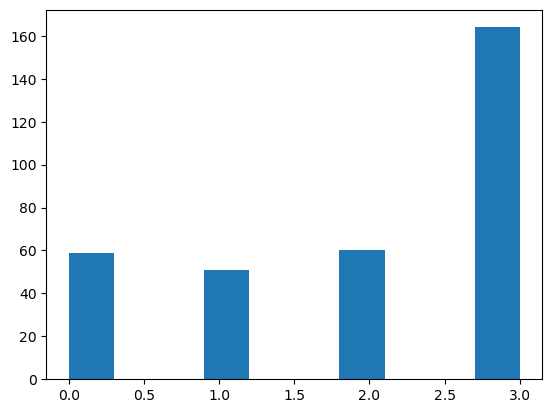

In [6]:
from matplotlib import pyplot as plt

plt.hist(data_calc["true count"])

In [7]:
# reference: https://datatab.net/tutorial/fleiss-kappa

def calcFKE(true_count, false_count):
    num_judge = sum(true_count) + sum(false_count)
    n = true_count[0] + false_count[0]
    
    # expect random judgement
    pe = (sum(true_count)/num_judge)**2 + (sum(false_count)/num_judge)**2
    
    # observed agreement
    p0 = (sum(true_count**2) + sum(false_count**2) - num_judge) / (num_judge * (n-1))
    
    return (p0-pe)/(1-pe)

In [8]:
print(calcFKE(data_calc["true count"], data_calc["false count"]))

0.5051455572017779
